In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from skimage.io import imread
from skimage.color import rgb2gray
import os
import cv2

In [8]:
def calculate_feature_from_file(file_path):
    features = []
    for path in file_path:
        image = imread(path)  #depth map
        image_flat = image.flatten()
        mean_val = np.mean(image_flat)
        std_val = np.std(image_flat)
        min_depth = np.min(image_flat)
        max_depth = np.max(image_flat)
        median_depth = np.median(image_flat)
        q1 = np.percentile(image_flat, 25)
        q3 = np.percentile(image_flat, 75)
        iqr = q3 - q1
        gradient_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize = 3)
        gradient_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize = 3)
        depth_gradient = np.sqrt(gradient_x**2 + gradient_y**2)
        mean_gradient = np.mean(depth_gradient)
        std_gradient = np.std(depth_gradient)
        features.append([mean_val, std_val, min_depth, max_depth, median_depth, iqr, mean_gradient, std_gradient])
    if len(features) > 0:
        return np.mean(features, axis = 0)
    else:
        return None

In [5]:
all_features = []
file_indices = []

In [9]:
for i in range(1,101):
    with open(f"../../parts/selected_part_{i}.txt","r")as file:
        print(f"Reading file part_{i}")
        paths_with_titles= []
        file_names = []
        for line in file:
            line = line.strip()
            if line.endswith(':'):
                current_title = line[0:-1]
            elif line:
                paths_with_titles.append((current_title, line))
    
    for title, path in paths_with_titles:
        if title == 'd':
            file_names.append(path)
    feature = calculate_feature_from_file(file_names)
    if feature is not None:
        all_features.append(feature)
        file_indices.append(i)

Reading file part_1
Reading file part_2
Reading file part_3
Reading file part_4
Reading file part_5
Reading file part_6
Reading file part_7
Reading file part_8
Reading file part_9
Reading file part_10
Reading file part_11
Reading file part_12
Reading file part_13
Reading file part_14
Reading file part_15
Reading file part_16
Reading file part_17
Reading file part_18
Reading file part_19
Reading file part_20
Reading file part_21
Reading file part_22
Reading file part_23
Reading file part_24
Reading file part_25
Reading file part_26
Reading file part_27
Reading file part_28
Reading file part_29
Reading file part_30
Reading file part_31
Reading file part_32
Reading file part_33
Reading file part_34
Reading file part_35
Reading file part_36
Reading file part_37
Reading file part_38
Reading file part_39
Reading file part_40
Reading file part_41
Reading file part_42
Reading file part_43
Reading file part_44
Reading file part_45
Reading file part_46
Reading file part_47
Reading file part_48
R

In [15]:
feature_array = np.array(all_features)
feature_array[0].shape

(8,)

In [16]:
with open('100data_features.txt', 'w') as f:
    f.write(f"index\tmean_val\tstd_val\tmin_depth\tmax_depth\tiqr\tmean_gradient\tstd_gradient\n")
    for idx, label in enumerate(feature_array):
        f.write(f"{idx}\t{label[0]}\t{label[1]}\t{label[2]}\t{label[3]}\t{label[5]}\t{label[6]}\t{label[7]}\n")

In [8]:
# convert feature list into a numpy array
feature_array = np.array(all_features) # reshape for clusting
# perform clustering
kmeans = KMeans(n_clusters=5).fit(feature_array)
labels = kmeans.labels_
# pca for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(feature_array)

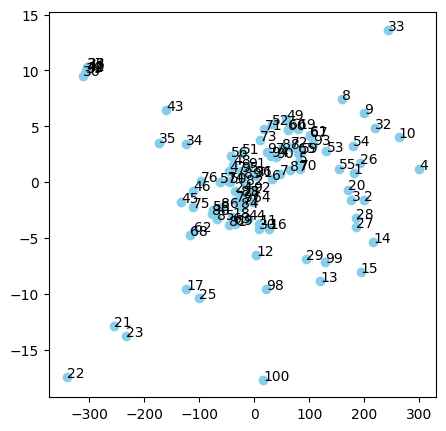

In [19]:
# visualize
plt.figure(figsize=(5,5))
for idx, label in enumerate(labels):
    plt.scatter(reduced_features[idx, 0], reduced_features[idx, 1], color='skyblue', marker= 'o')
    plt.text(reduced_features[idx, 0], reduced_features[idx, 1], file_indices[idx])

plt.savefig('100data_clustering.png')
plt.show()

In [20]:
with open('100data_clustering.txt', 'w') as f:
    for idx, label in enumerate(labels):
        f.write(f"{file_indices[idx]},{reduced_features[idx, 0]},{reduced_features[idx, 1]}\n")

In [34]:
# print members of each cluster
for cluster in range(5):
    print(f"Cluster {cluster}:")
    member = []
    for idx, label in enumerate(labels):
        if label == cluster:
            member.append(file_indices[idx])
    print(member)

Cluster 0:
[6, 11, 12, 16, 18, 24, 30, 31, 44, 47, 48, 50, 51, 52, 56, 63, 64, 69, 71, 73, 74, 77, 78, 79, 81, 82, 83, 84, 86, 89, 91, 92, 94, 95, 96, 97, 98, 100]
Cluster 1:
[21, 22, 23, 36, 37, 38, 39, 40, 41, 42]
Cluster 2:
[1, 2, 3, 4, 8, 9, 10, 14, 15, 20, 26, 27, 28, 32, 33, 54, 55]
Cluster 3:
[17, 25, 34, 35, 43, 45, 46, 57, 58, 62, 68, 75, 76, 80, 85]
Cluster 4:
[5, 7, 13, 19, 29, 49, 53, 59, 60, 61, 65, 66, 67, 70, 72, 87, 88, 90, 93, 99]
